# 12.2.1 - Gensim word vector visualization of various word vectors

In this notebook we will explore word vectors. To achieve this we will use the  Gensim library with pretrained GloVe vectors. Gensim allows us to convert a file of GloVe vectors into word2vec format.

The 100d GloVe embeddings are used within the notebook, however there are various dimensions such as 50 and 300.

Adapted from: *CS224n: Natural Language Processing with Deep Learning*

## Import Libraries

In [1]:
import numpy as np

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA

In [2]:
# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Load word embedding model from disk
It's assumed that the glove.6B.100d.txt embeddings have been correctly placed in the /data folder.

The entire dataset can be downloaded from http://nlp.stanford.edu/data/glove.6B.zip which contains 50,100,300 dimension pretrained embedding models. 

In [25]:
from pathlib import Path
data_path = Path('../data/glove.6B.50d.txt').resolve()

In [26]:
# Load embedding model
glove_file = datapath(data_path)
word2vec_glove_file = get_tmpfile("glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

## Word similarities

In [27]:
model.most_similar('obama')

[('barack', 0.9674171805381775),
 ('bush', 0.9642481207847595),
 ('clinton', 0.9606046080589294),
 ('mccain', 0.912293553352356),
 ('dole', 0.8878743052482605),
 ('gore', 0.8848039507865906),
 ('hillary', 0.8776552081108093),
 ('rodham', 0.8401790857315063),
 ('kerry', 0.8261427879333496),
 ('biden', 0.8095825910568237)]

In [28]:
model.most_similar('gold')

[('silver', 0.9498046636581421),
 ('bronze', 0.8349127173423767),
 ('diamond', 0.7714747190475464),
 ('medal', 0.7671744227409363),
 ('medals', 0.7655052542686462),
 ('golds', 0.7161261439323425),
 ('medalist', 0.7153223752975464),
 ('olympic', 0.7142017483711243),
 ('golden', 0.7051926255226135),
 ('platinum', 0.6958608031272888)]

In [29]:
model.most_similar('apple')

[('blackberry', 0.7543067932128906),
 ('chips', 0.7438644170761108),
 ('iphone', 0.7429664731025696),
 ('microsoft', 0.7334205508232117),
 ('ipad', 0.7331036925315857),
 ('pc', 0.7217225432395935),
 ('ipod', 0.7199784517288208),
 ('intel', 0.7192243933677673),
 ('ibm', 0.7146540880203247),
 ('software', 0.7093584537506104)]

In [30]:
model.most_similar(negative='apple')

[('em96', 0.7769892811775208),
 ('gph04bb', 0.7755878567695618),
 ('greg.wilcoxdailynews.com', 0.7684248089790344),
 ('str94', 0.7672470808029175),
 ('rw95', 0.7661100029945374),
 ('js04bb', 0.7603805661201477),
 ('kd96', 0.7453822493553162),
 ('http://www.opel.com', 0.741449236869812),
 ('kd97', 0.7287870049476624),
 ('poskrebyshev', 0.7231611013412476)]

In [31]:
# King - man + woman = queen?
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8524


## Analogies "A is to B as C is to ?"

In [14]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

![Analogy](https://mlwhiz.com/images/word2vec.png)

[mlwhiz](https://mlwhiz.com/images/word2vec.png)

In [32]:
analogy('japan', 'japanese', 'australia')

'australian'

In [33]:
analogy('australia', 'beer', 'france')

'champagne'

In [34]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [35]:
analogy('tall', 'tallest', 'long')

'longest'

In [36]:
analogy('good', 'fantastic', 'bad')

'dreadful'

### Finding the odd word out

In [37]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


c:\users\22917746\appdata\local\programs\python\python36\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


Check out https://rare-technologies.com/word2vec-tutorial/ for an interactive web-based application that allows you to do play with different functionalties of word embeddings.

## Visualisation of words in 2D

In [42]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='b', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    
    plt.show()

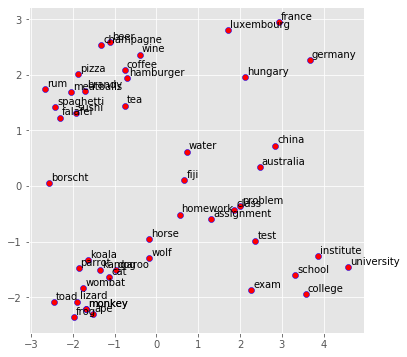

In [43]:
# Visualise groups of beverages, foods, animals, locations, etc, to see how they cluster in 2D space.
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

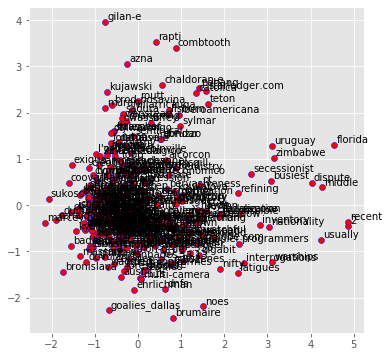

In [47]:
# Visualise 300 samples in 2D space.
display_pca_scatterplot(model, sample=300)